In [1]:
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
# get names of available example datasets
print(*sns.get_dataset_names())

anagrams anscombe attention brain_networks car_crashes diamonds dots exercise flights fmri gammas geyser iris mpg penguins planets tips titanic


In [4]:
planets = sns.load_dataset('planets')
print(len(planets))
planets.sort_values('distance', inplace=True)
planets.head()

1035


,method,number,orbital_period,mass,distance,year
46,Radial Velocity,1,3.2357,0.0036,1.35,2012
48,Radial Velocity,1,2502.0000,1.5500,3.22,2000
136,Radial Velocity,1,4.6938,0.0350,4.54,2007
145,Radial Velocity,4,124.2600,0.0460,4.70,2010
143,Radial Velocity,4,30.0881,0.7142,4.70,2000


In [5]:
iris = sns.load_dataset('iris')
print(len(iris))
iris.sort_values('sepal_length', inplace=True)
iris.head()

150


,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa


In [52]:
list( map(lambda s: s.replace('_', ' '), iris.columns.tolist()) )

['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

Two general ways of plotting:

```
plt.hist(X)
```

```
fig, ax = plt.subplots()
ax.hist(X)
```

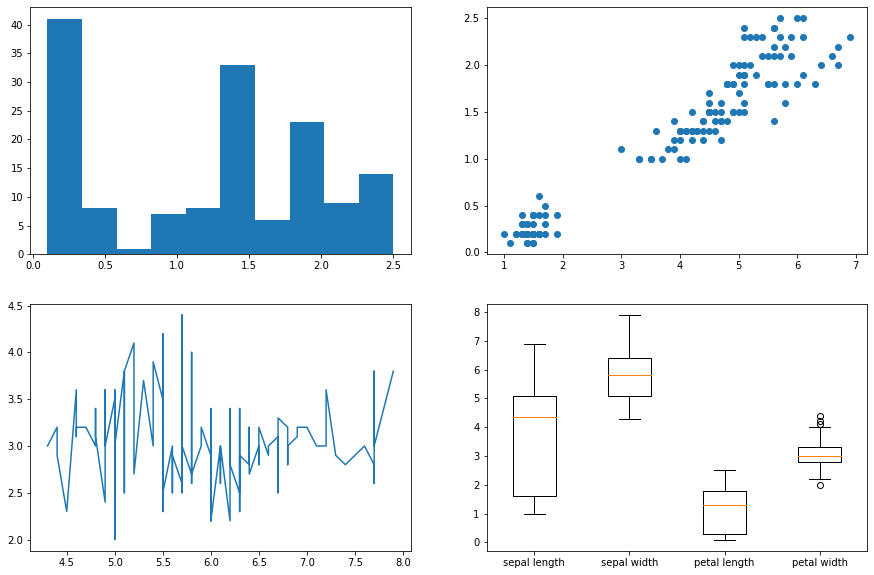

In [56]:
# different kinds of plots

fig, ax = plt.subplots(2,2, figsize=(15, 10))
ax = ax.ravel()
ax[0].hist(iris['petal_width'])
ax[1].scatter(iris['petal_length'], iris['petal_width'])
ax[2].plot(iris['sepal_length'], iris['sepal_width'])

datasets = (iris['petal_length'], iris['sepal_length'], iris['petal_width'], iris['sepal_width'],)
labels = list( map(lambda s: s.replace('_', ' '), iris.columns.tolist()) )[:4]

ax[3].boxplot(datasets, labels=labels)
None

In [2]:
# Creating a video animation
# Other methods don't work very well
#=========================================
# Based on:
# https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter

#=========================================
# Create Fake Images using Numpy 
# You don't need this in your code as you have your own imageList.
# This is used as an example.

imageList = []
x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    imageList.append(np.sin(x) + np.cos(y))

#=========================================
# Animate Fake Images (in Jupyter)

def getImageFromList(x):
    return imageList[x]

fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(len(imageList)):
    im = plt.imshow(getImageFromList(i), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani.to_html5_video())